# Weak IV Experiments

Simulation Design

In [3]:
# Simulation Design
install.packages("librarian")
librarian::shelf(hdm)

set.seed(1)
B= 10000 # trials
IVEst = rep(0, B)
n=100
beta = .25   # .2 weak IV
#beta = 1   #   1 strong IV


U =  rnorm(n)  
Z = rnorm(n)  #generate instrument
D = beta*Z + U  #generate endogenougs variable
Y =  D+ U  # the true causal effect is 1


summary(lm(D~Z))  # first stage is very weak here

summary(tsls(x=NULL, d=D, y=Y, z=Z))  #


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘BiocManager’



  These packages will be installed:

  'hdm'

  It may take some time.

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’, ‘glmnet’, ‘checkmate’, ‘Formula’





Call:
lm(formula = D ~ Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32416 -0.60361  0.00536  0.58305  2.29316 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.10885    0.09035   1.205  0.23118   
Z            0.24907    0.09472   2.629  0.00993 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9028 on 98 degrees of freedom
Multiple R-squared:  0.0659,	Adjusted R-squared:  0.05637 
F-statistic: 6.914 on 1 and 98 DF,  p-value: 0.009931


[1] "Estimates and Significance Testing from from tsls"
            Estimate Std. Error t value p value   
d1           0.99626    0.38173   2.610 0.00906 **
(Intercept)  0.10926    0.09824   1.112 0.26608   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




Note that the instrument is weak here (contolled by $\beta$) -- the t-stat is less than 4.

## Run 1000 trials to evaluate distribution of the IV estimator

In [4]:
# Simulation Design

set.seed(1)
B= 10000 # trials
IVEst = rep(0, B)

for(i in 1:B){
U =  rnorm(n)  
Z = rnorm(n)  #generate instrument
D = beta*Z + U  #generate endogenougs variable
Y =  D+ U  # the true causal effect is 1
IVEst[i] = coef(tsls(x=NULL, d=D, y=Y, z=Z))[1,1]
}



## Plot the Actual Distribution against the Normal Approximation (based on Strong Instrument Assumption)

Rejection Frequency is  0.1401  while we expect it to be .05

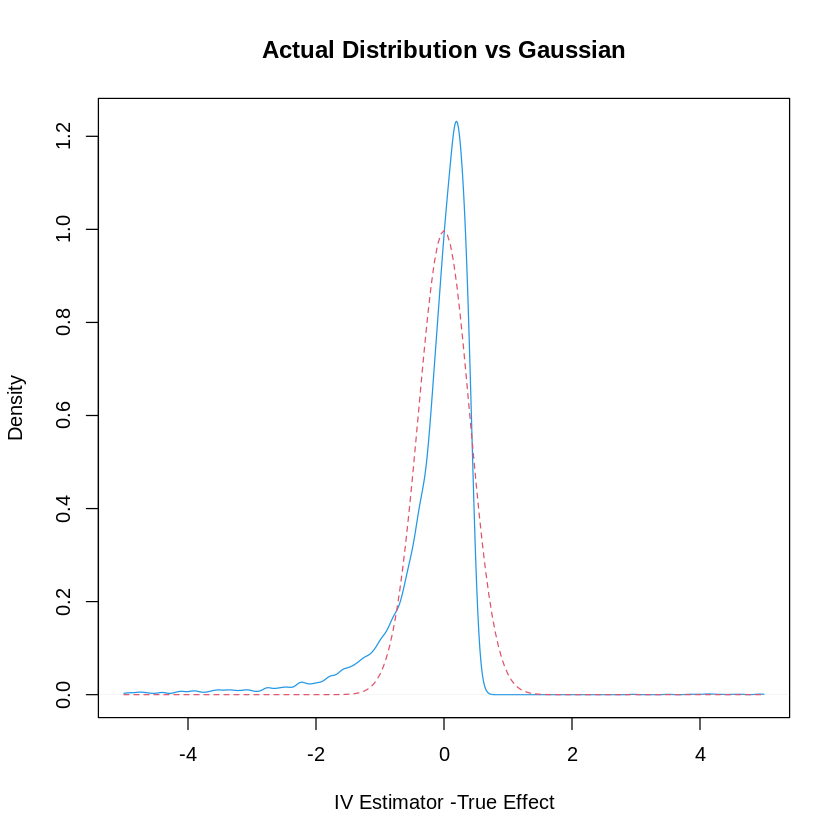

In [5]:
plot(density(IVEst-1, n=1000, from=-5, to=5),col=4, xlim= c(-5, 5),  
     xlab= "IV Estimator -True Effect", main="Actual Distribution vs Gaussian")

val=seq(-5, 5, by=.05)
var = (1/beta^2)*(1/100) # theoretical variance of IV
sd = sqrt(var)
lines(val, dnorm(val, sd=sd), col=2, lty=2)

rejection.frequency = sum(( abs(IVEst-1)/sd > 1.96))/B

cat(c("Rejection Frequency is ", rejection.frequency, " while we expect it to be .05"))


### Some Help Functions

In [7]:
# help(tsls)

# help(density)